In [89]:
# -*- coding: utf-8 -*-
import logging
from pathlib import Path

import pandas as pd
import numpy as np

import cloudpickle
import click

import numpy as np

import matplotlib.pyplot as plt

In [90]:
models = '../models'

In [91]:
model_file = Path(models) / 'logistic_model.pkl'
with open(model_file, 'rb') as fp:
    fitted_model = cloudpickle.load(fp)

In [92]:
grid_results = fitted_model.cv_results_

In [93]:
AUC = grid_results['mean_test_AUC']

n_estimators


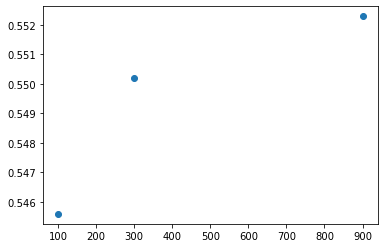

{'n_estimators': array([100., 300., 900.])}

In [94]:
param_dict = {}
for key, value in grid_results.items():
    if 'param_clf__' in key:
        name = key.replace('param_clf__', '')
        new = np.array(np.ma.getdata(grid_results[key]), dtype=np.float)
        param_dict[name] = new
        print(name)
        plt.figure()
        plt.scatter(new, AUC)
        plt.show()

param_dict

In [88]:
print("Best: %f using %s" % (fitted_model.best_score_, 
    fitted_model.best_params_))

Best: 0.551697 using {'clf__learning_rate': 0.05}


In [81]:
fitted_model.cv_results_

{'mean_fit_time': array([ 13.69758558,  65.23454777, 158.18811409,  25.09060947,
         89.0971988 , 149.76340095,  22.42693567,  74.09325322,
        119.7389257 ]),
 'std_fit_time': array([ 2.2292198 ,  1.32935511,  1.27946627,  4.13688433,  2.31629384,
         5.72642008,  0.79423729,  0.8687804 , 16.11203761]),
 'mean_score_time': array([0.51502832, 1.15720415, 1.61626951, 1.17849628, 1.30891856,
        1.3661437 , 0.6055421 , 0.80244676, 0.49435433]),
 'std_score_time': array([0.02756111, 0.09424321, 0.54761986, 0.5605476 , 0.23737132,
        0.01277565, 0.08071319, 0.05014029, 0.08814345]),
 'param_clf__learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.01, 0.01, 0.01],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_clf__n_estimators': masked_array(data=[100, 300, 600, 100, 300, 600, 100, 300, 600],
              mask=[False, False, False, F

In [31]:
learning_rates = np.ma.getdata(grid_results['param_clf__learning_rate'])
learning_rates = np.ma.getdata(grid_results['param_clf__learning_rate'])
# alphas = np.ma.getdata(grid_results['param_clf__alpha'])
# rates = np.ma.getdata(grid_results['param_clf__optimizer__learning_rate'])
# dims = np.ma.getdata(grid_results['param_clf__hidden_layer_dim'])
# b_size = np.ma.getdata(grid_results['param_clf__batch_size'])
# opts = np.ma.getdata(grid_results['param_clf__optimizer'])

In [32]:
log_rates =np.log(rates)

NameError: name 'rates' is not defined

In [33]:
df = pd.DataFrame(np.stack((log_rates, dims, AUC), axis=-1))

NameError: name 'log_rates' is not defined

In [34]:
df.columns = ['log_rates', 'dims', 'auc']

NameError: name 'df' is not defined

NameError: name 'df' is not defined

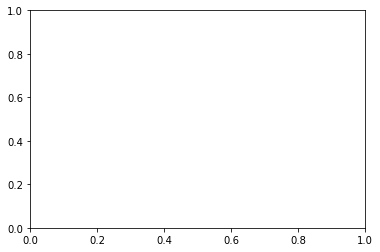

In [35]:
fig, ax2 = plt.subplots(1,1);
df.groupby('dims').plot('log_rates', 'auc', ax=ax2)
plt.legend([v[0] for v in df.groupby('dims')['dims']])

In [36]:
alphas = np.array(alphas, dtype=np.float)
log_alphas =np.log(alphas)
plt.scatter(log_alphas, AUC)

NameError: name 'alphas' is not defined

In [37]:
plt.scatter(log_rates, AUC)

NameError: name 'log_rates' is not defined

In [38]:
plt.scatter(opts, AUC)

NameError: name 'opts' is not defined

Best: 0.497589 using {'clf__learning_rate': 0.01, 'clf__max_iter': 400}
